# Crypto currencies Twitter Sentiment Analysis

## Table of Contents

- [Libraries](#libraries) <br>
- [API Credentials](#api) <br>
- [Functions](#functions) <br>
- [Twitter Analysis using Twitter API](#tweepy) <br>

## Libraries
<a id="libraries"></a>

In [1]:
import pandas as pd
import numpy as np
import sys
import os
import datetime
from datetime import timedelta
import re
import string
from textblob import TextBlob

import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to C:\Users\VG
[nltk_data]     Rig\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\VG Rig\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## API Credentials
<a id="api"></a>

In [2]:
import tweepy as tw #Twitter API

cred = { 
    "consumer_key" : "CONSUMER KEY",
    "consumer_secret" : "CONSUMER SECRET",
    "access_token" : "ACCESS TOKEN",
    "access_token_secret" : "ACCESS TOKEN SECRET"
        }

consumer_key = cred['consumer_key']
consumer_secret = cred['consumer_secret']
access_token = cred['access_token']
access_token_secret = cred['access_token_secret']

#create the authentication object
authenticate = tw.OAuthHandler(consumer_key, consumer_secret)
#set the access token and the access token secret
authenticate.set_access_token(access_token, access_token_secret)
#create the api object
twitter = tw.API(authenticate, wait_on_rate_limit = True )

## Functions
<a id="functions"></a>

In [3]:
# Create a function that perform tweet pre-processing
def preprocess_tweet(row):
    
    text = row['tweet']
    text = p.clean(text) 
    #clean to normal text removes hashtags and emojis
    text = re.sub(r'[^\w]', '', text) #Removes all symbols
    text = text.lower() # lowercases all words
    text = re.sub(r'\d+', '', text) # Removes numbers
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    text = remove_stopwords(text) #removes stopwords
    text = re.sub(r'\W*\b\w{1,2}\b', '', text) 
    
    return text

In [4]:
# Create a function that clean the dataframe
def cleanTwt(twt):
    
    twt = twt.lower()
    
    twt = re.sub('#bitcoin', 'bitcoin', twt) #removes the hashtag from bitcoin
    twt = re.sub('#Bitcoin', 'bitcoin', twt) #removes the hashtag from Bitcoin
    twt = re.sub('#[A-Za-z0-9]+', '', twt) #removes any strings with the hashtag
    twt = re.sub('\\n', '', twt) #removes the \n in charachter 
    twt = re.sub('https?:\/\/\S+', '' ,twt) #removes hyperlinks
    twt = re.sub('\[.*?\]', '', twt)
    twt = re.sub('[%s]' % re.escape(string.punctuation), '', twt)
    twt = re.sub('\w*\d\w*', '', twt)  
    twt = re.sub('[‘’“”…]', '', twt)   
    twt = re.sub('\n', ' ', twt)   
   

    # Remove stop_word
    stop_words = stopwords.words('english')
    words = word_tokenize(twt)
    
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
            
    return twt

In [5]:
wnl = WordNetLemmatizer()

# Create a function to perform lemmatization
def lemmatize_tag(text):
    
    lemma=[]
    for i,j in pos_tag(word_tokenize(text)) :
        p=j[0].lower()
        if p in ['j','n','v']:
            if p == 'j':
                p = 'a'
            lemma.append(wnl.lemmatize(i,p))
        else :
            lemma.append(wnl.lemmatize(i))    
    
    return ' '.join(lemma)


# Twitter Analysis using Tweepy
<a id="tweepy"></a>
1. [Query by Search word](#word) <br>
1.1 [Mining](#mining) <br>
1.2 [Sentiment Analysis using TextBlob](#sentiment) <br> 
1.3 [WordCounts & WordCloud](#word) </br>
2. [Query by Person](#person) <br>

## Query by search word:
<a id="word"></a>
The aim is to analyse today's tweets on a single topic, in this case <mark>Bitcoin</mark>. We are going to extrapolate the "trending" tweets, perceive the sentiment regarding the topic on Twitter and finally identify the most recurrent words in the tweets.

### Tweets mining

In [6]:
# Define the search term and tomorrow as variables
search_word = "#bitcoin"
tomorrow = datetime.date.today() + timedelta(days=1) 

In [7]:
# Collect 1K tweets
tweets = tw.Cursor(twitter.search,
              q = search_word + " -filter:retweets",
              lang = "en",
              tweet_mode='extended',
              until = tomorrow).items(1000)

# Extract usefull information from tweets
all_tweets = [[tweet.full_text, 
               tweet.user.screen_name,
               tweet.favorite_count,
               tweet.retweet_count,
               tweet.created_at] for tweet in tweets]

In [8]:
# Save all the tweets into a df
tweet_text = pd.DataFrame(data=all_tweets, 
                    columns=['Tweet','User', 'Favourite', 'Retweet', 'Time'])

Tweets cleaning

In [9]:
# Clean the tweets
tweet_text['Tweet'] = tweet_text['Tweet'].apply(cleanTwt)

Stemming/Lemmatization

In [10]:
# Perform lemmatization to the tweets
tweet_text['Tweet'] = pd.DataFrame(tweet_text.Tweet.apply(lemmatize_tag))

In [11]:
# Sort the df by numbers of 'favourite' and 'retweet'
tweet_text.sort_values(by=['Favourite', 'Retweet'], ascending=False)

,Tweet,User,Favourite,Retweet,Time
521,goldman sachs ceo theres no question that inst...,DocumentingBTC,503,113,2021-05-27 20:59:48
139,im all in on bitcoin,TheMoonCarl,298,25,2021-05-27 21:15:39
488,🔍 new knot finance💲reward up to worth knot wor...,AirdropDet,215,224,2021-05-27 21:00:15
630,be talk about bitcoin with tonevays amp jessic...,TheMoonCarl,189,11,2021-05-27 20:54:15
160,bitcoin be need stop that crazy talk,davidgokhshtein,132,18,2021-05-27 21:14:37
...,...,...,...,...,...
994,for the record i stay toxic it the result of s...,KalKassa,0,0,2021-05-27 20:37:51
995,you want to participate in the craze and get r...,sirbanksalot,0,0,2021-05-27 20:37:47
996,great time to buy bitcoin dipfind out which ex...,Exchange_Info_,0,0,2021-05-27 20:37:41
997,paramount‼️ 💯📚📝🧠 bitcoin,hoopdreamsbball,0,0,2021-05-27 20:37:38


### Sentiment Analysis using TextBlob
<a id="sentiment"></a>

_Polarity_ is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. _Subjective_ sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [12]:
# Function to get the subjectivity
def getSubjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity
# Function to get the polarity
def getPolarity(twt):
    return TextBlob(twt).sentiment.polarity

#create two new columns: subjectivity and polarity 
tweet_text['Subjectivity'] = tweet_text['Tweet'].apply(getSubjectivity)
tweet_text['Polarity'] = tweet_text['Tweet'].apply(getPolarity)

In [13]:
#create a function to get the sentiment text
def getSentiment(score):
    if score < 0: 
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [14]:
# Create a column to store the text sentiment
tweet_text['Sentiment'] = tweet_text['Polarity'].apply(getSentiment)
# Show the date
tweet_text.head(5)

,Tweet,User,Favourite,Retweet,Time,Subjectivity,Polarity,Sentiment
0,call all pleb get your daily news may feature ...,WorldWarBitcoin,0,0,2021-05-27 21:22:26,0.000000,0.00000,Neutral
1,parikpatelcfa my price target be i calculate t...,suleanjali,0,0,2021-05-27 21:22:24,0.200000,0.00000,Neutral
2,bitcoin 🌕smarts and whale load bleed the noobs...,DemApples00,0,0,2021-05-27 21:22:23,0.000000,0.00000,Neutral
3,but bitcoin have not be able to clear mental n...,ChrisiFarah,0,0,2021-05-27 21:22:22,0.521667,0.22000,Positive
4,the bitcoinpizza would be worth right now down...,TheBitcoinPizza,0,0,2021-05-27 21:22:09,0.247817,0.10754,Positive


**Scatter Plot**

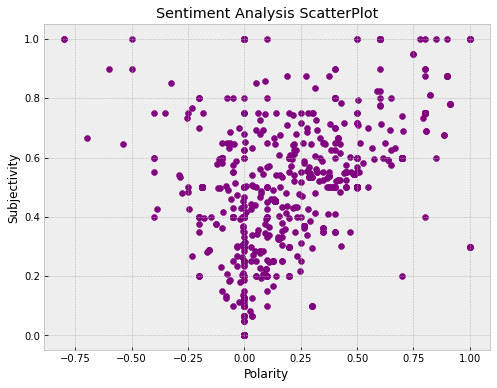

In [15]:
# Create a scatter plot
plt.style.use(['bmh'])
plt.figure(figsize = (8,6))
for i in range (0, tweet_text.shape[0]):
    plt.scatter(tweet_text['Polarity'][i], tweet_text['Subjectivity'][i], color = 'Purple')
plt.title('Sentiment Analysis ScatterPlot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

**BarChart**

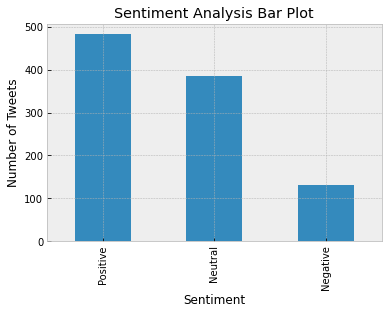

In [16]:
# Create a bar chart to show the count of positive, neutral and negative sentiments
plt.style.use(['bmh'])
from matplotlib.ticker import FuncFormatter

tweet_text['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [17]:
tweet_text['Sentiment'].value_counts()

Positive    482
Neutral     386
Negative    132
Name: Sentiment, dtype: int64

**Avg Subjectivity/Polarity**

In [18]:
avg_subjectivity = tweet_text['Subjectivity'].mean(axis = 0)
avg_polarity = tweet_text['Polarity'].mean(axis = 0)
print(avg_subjectivity)
print(avg_polarity)

0.3562212942606337
0.16648046288136495


**Tweets trending**

In [19]:
# Let's define boundaries which define a trend in #bitcoin tweets
favourite_limit = 50
retweet_limit = 10

In [20]:
tweet_trend = tweet_text.loc[(tweet_text['Favourite']>= favourite_limit) & (tweet_text['Retweet']>= retweet_limit)].sort_values(by=['Favourite', 'Retweet'], ascending=False)
tweet_trend

,Tweet,User,Favourite,Retweet,Time,Subjectivity,Polarity,Sentiment
521,goldman sachs ceo theres no question that inst...,DocumentingBTC,503,113,2021-05-27 20:59:48,0.400000,0.000000,Neutral
139,im all in on bitcoin,TheMoonCarl,298,25,2021-05-27 21:15:39,0.000000,0.000000,Neutral
488,🔍 new knot finance💲reward up to worth knot wor...,AirdropDet,215,224,2021-05-27 21:00:15,0.218182,0.245455,Positive
630,be talk about bitcoin with tonevays amp jessic...,TheMoonCarl,189,11,2021-05-27 20:54:15,0.000000,0.000000,Neutral
160,bitcoin be need stop that crazy talk,davidgokhshtein,132,18,2021-05-27 21:14:37,0.900000,-0.600000,Negative
389,alert sec begin formal review of fidelity and ...,MrktMeditations,86,14,2021-05-27 21:03:20,0.600000,-0.100000,Negative
985,solomon im extremely cautious on bitcoin buyer...,carlquintanilla,72,21,2021-05-27 20:38:19,0.650000,-0.062500,Negative


### WordCounts & WordClouds

In [21]:
# Create a new df composed only by the text of the tweets grouped by their sentiments
sentiment_text = tweet_text.groupby('Sentiment')['Tweet'].apply(' '.join).reset_index()
sentiment_text = sentiment_text.set_index('Sentiment')

In [22]:
sentiment_text

,Tweet
Sentiment,
Negative,though the bank of canada doesnt plan on launc...
Neutral,call all pleb get your daily news may feature ...
Positive,but bitcoin have not be able to clear mental n...


**Document term matrix**

In [23]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(sentiment_text.Tweet)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = sentiment_text.index
data_dtm

,aantonop,aantonops,aapl,aasmakov,aave,aback,abhieleven,able,aboard,abortion,...,zzaks,ıb,𝐁𝐫𝐢𝐭𝐢𝐬𝐡,𝐖𝐨𝐫𝐬𝐭,𝐚𝐛𝐨𝐮𝐭,𝐛𝐚𝐧𝐤,𝐜𝐥𝐢𝐞𝐧𝐭𝐬,𝐜𝐫𝐲𝐩𝐭𝐨,𝐬𝐜𝐚𝐦𝐦𝐞𝐫𝐬,𝐰𝐚𝐫𝐧𝐬
Sentiment,,,,,,,,,,,,,,,,,,,,,
Negative,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Neutral,0,0,1,1,1,1,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
Positive,1,1,0,0,2,0,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Let's see how many times Bitcoin is present in a sentence based also on the perceived sentiment of that sentence
data_dtm[['bitcoin']]

,bitcoin
Sentiment,
Negative,137
Neutral,392
Positive,499


**Common words**

In [25]:
# Find the top 30 words for each perceived sentiment [negative/neutral/positive]
data=data_dtm.transpose()

top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Negative': [('bitcoin', 137),
  ('bag', 31),
  ('little', 22),
  ('help', 18),
  ('turkey', 16),
  ('gift', 16),
  ('expense', 15),
  ('elonmusk', 15),
  ('tesla', 15),
  ('school', 15),
  ('chiliz', 15),
  ('market', 13),
  ('price', 13),
  ('long', 12),
  ('sec', 10),
  ('just', 10),
  ('follow', 10),
  ('say', 9),
  ('energy', 8),
  ('think', 8),
  ('want', 8),
  ('btc', 8),
  ('position', 8),
  ('let', 8),
  ('like', 7),
  ('crypto', 7),
  ('week', 7),
  ('support', 7),
  ('need', 7),
  ('friend', 6)],
 'Neutral': [('bitcoin', 392),
  ('btc', 61),
  ('price', 35),
  ('follow', 22),
  ('check', 17),
  ('time', 14),
  ('link', 14),
  ('crypto', 14),
  ('amp', 14),
  ('hour', 14),
  ('buy', 13),
  ('website', 13),
  ('crash', 13),
  ('eth', 12),
  ('support', 12),
  ('friend', 12),
  ('doge', 11),
  ('knot', 11),
  ('current', 11),
  ('just', 11),
  ('market', 10),
  ('alert', 10),
  ('day', 10),
  ('ethereum', 10),
  ('future', 9),
  ('make', 9),
  ('say', 9),
  ('moon', 9),
  ('le

In [26]:
# Print the top 30 words said following the sentiment division
for sentiment, top_words in top_dict.items():
    print(sentiment)
    print(', '.join([word for word, count in top_words[0:30]]))
    print('---')

Negative
bitcoin, bag, little, help, turkey, gift, expense, elonmusk, tesla, school, chiliz, market, price, long, sec, just, follow, say, energy, think, want, btc, position, let, like, crypto, week, support, need, friend
---
Neutral
bitcoin, btc, price, follow, check, time, link, crypto, amp, hour, buy, website, crash, eth, support, friend, doge, knot, current, just, market, alert, day, ethereum, future, make, say, moon, let, opensea
---
Positive
bitcoin, project, good, airdropdet, knot, knotfinance, great, future, btc, new, make, buy, price, hope, hopefully, successful, think, amp, right, people, crypto, join, use, look, nice, money, low, clear, worth, follow
---


**WordCounts**

In [27]:
x = data.sort_values(by=['Positive','Neutral','Negative'], ascending=True)

data_top5_positive = x['Positive'].tail(5)

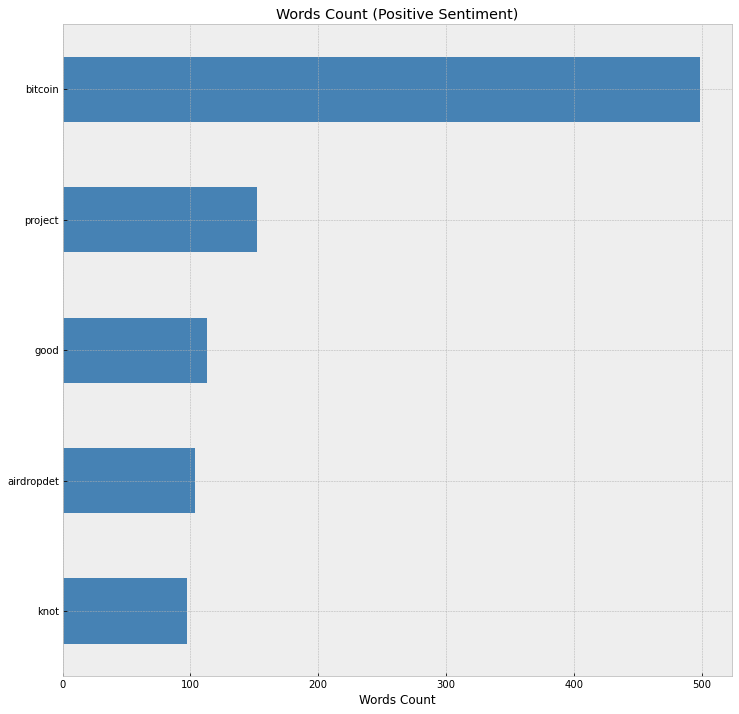

In [28]:
data_top5_positive.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Words Count')
plt.title('Words Count (Positive Sentiment)')

# annotate value labels to each country
for index, value in enumerate(data_top5_positive): 
    label = format(int(value), ',') # format int with commas

plt.show()

**WordCloud**

In [51]:
from wordcloud import WordCloud
from PIL import Image

bitcoin_image = np.array(Image.open("image_new.jpeg"))
wc = WordCloud(collocations=False,mask=bitcoin_image, background_color="white", colormap="Dark2",
              max_font_size=400, random_state=42)

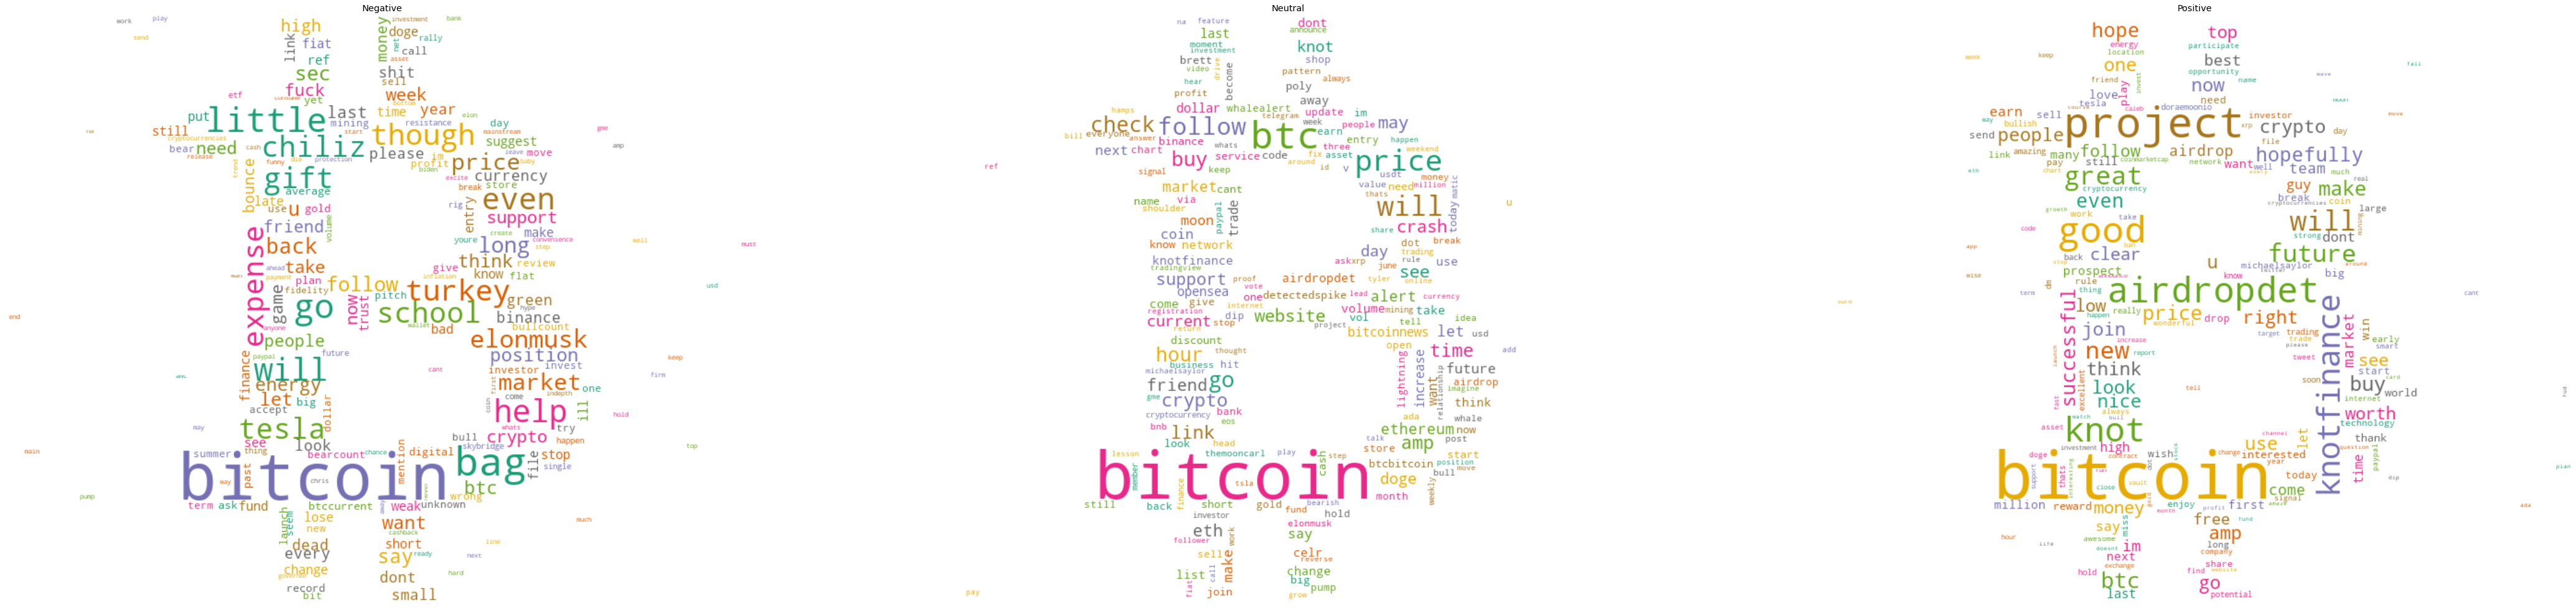

In [52]:
plt.rcParams['figure.figsize'] = [100,100]

# Create subplots for each comedian
for index, sentiment in enumerate(data.columns):
    wc.generate(sentiment_text.Tweet[sentiment])
    
    plt.subplot(4, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(data.columns[index])
    
plt.show()

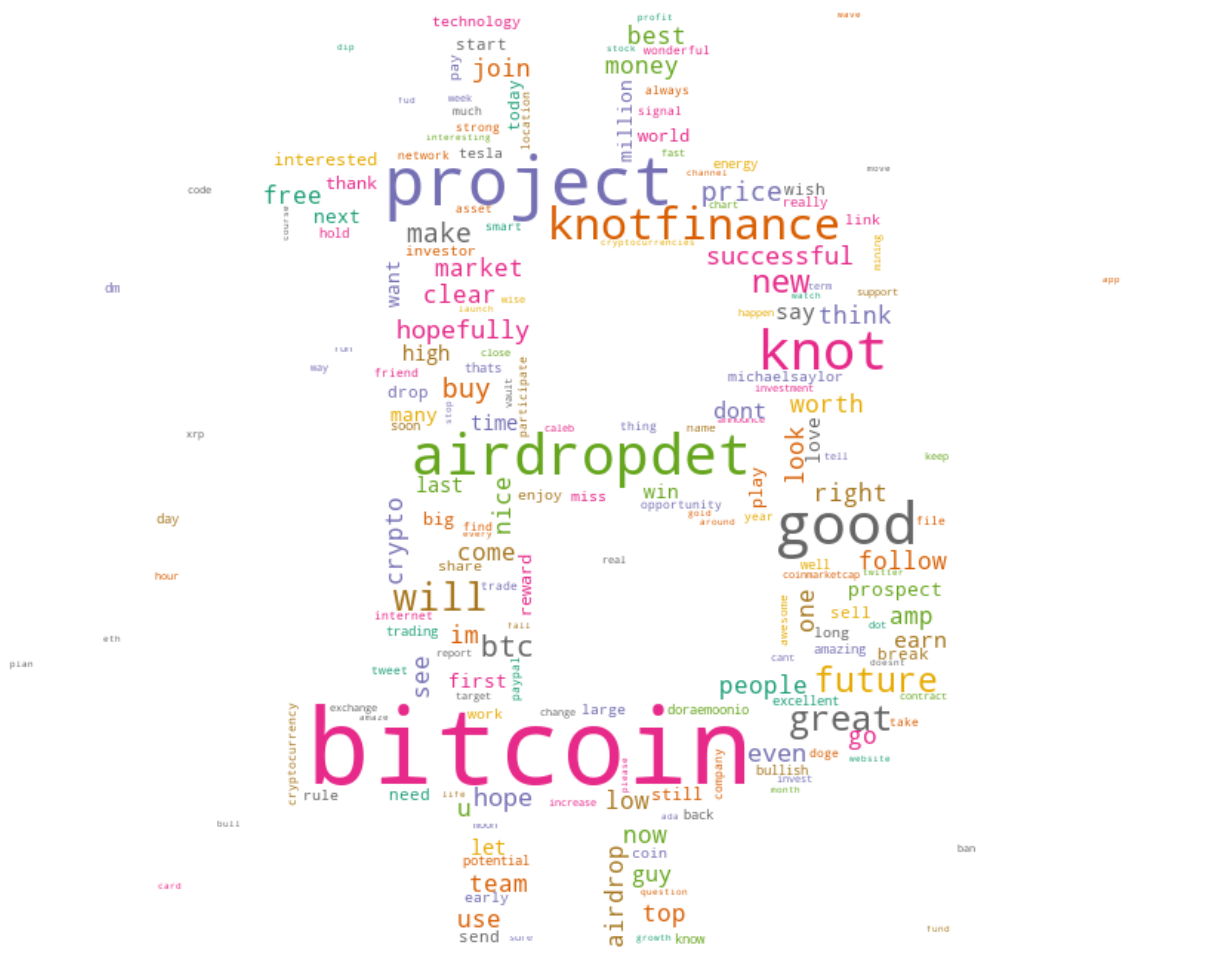

In [53]:
# Create WordCLoud only for the positive sentences
wc.generate(sentiment_text.Tweet[sentiment])
    
plt.subplot(4, 4, index+1)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
#plt.title(data.columns[index])

plt.show()

## Query by person
<a id="person"></a>

### Tweets mining
The aim is to analyse the past 7 days tweets by a single person (<mark>Elon Musk</mark>).The analysis may provide some interesting insights as Elon Musk represents one of the most influential people in cryptocurrency at the moment.

In [32]:
name = 'ElonMusk'
tweet_id = '44196397'

In [33]:
EM_tweets = tw.Cursor(twitter.user_timeline,
                      id=tweet_id, tweet_mode='extended',
                      q = search_word + " -filter:retweets").items()

all_EM_tweets = [[tweet.full_text,
                 tweet.favorite_count,
                 tweet.retweet_count,
                 tweet.created_at,
                 tweet.id] for tweet in EM_tweets]

In [34]:
EM_tweet_text = pd.DataFrame(data=all_EM_tweets, 
                    columns=['Tweet', 'Favourite', 'Retweet', 'Time','Tweet_id'])

Tweets cleaning

In [ ]:
# Clean the tweets
EM_tweet_text['Tweet'] = EM_tweet_text['Tweet'].apply(cleanTwt)

### EDA

In [35]:
# Tweets from Elon Musk last 7 days
EM_tweet_text.sort_values(by=['Favourite', 'Retweet'], ascending=False)

,Tweet,Favourite,Retweet,Time,Tweet_id
26,,424716,46251,2021-05-22 22:22:56,1396230120692543489
23,spoke with north american bitcoin miners they ...,327886,39553,2021-05-24 19:42:36,1396914548167233537
55,how much is that doge in the window,311878,55864,2021-05-20 10:41:00,1395328697436033032
30,any sufficiently advanced magic is indistingui...,289681,24584,2021-05-22 09:22:41,1396033766490087426
10,deep thots,265943,25997,2021-05-26 18:47:30,1397625459437826049
56,tesla model s plaid delivery eventjune at our...,200430,15055,2021-05-20 07:54:54,1395286896842985479
22,if youd like to help develop doge please submi...,190717,33671,2021-05-24 19:49:56,1396916392629137409
21,someone suggested changing dogecoin fees based...,126016,12248,2021-05-24 20:29:33,1396926365996261382
9,if only they had spaceships theyd still be around,120703,5107,2021-05-26 18:49:21,1397625923256549376
34,teslaownerssv this will actually be able to fl...,78869,6057,2021-05-21 01:40:10,1395554979851554817


In [36]:
# obtain datetime series:
datetimes = pd.to_datetime(EM_tweet_text['Time'])

# assign your new columns
EM_tweet_text['Day'] = datetimes.dt.day
EM_tweet_text['Hour'] = datetimes.dt.hour

In [37]:
EM_tweet_trend = EM_tweet_text[['Tweet_id','Favourite','Retweet', 'Time', 'Hour', 'Day']]

In [38]:
EM_tweet_trend

,Tweet_id,Favourite,Retweet,Time,Hour,Day
0,1397953188163096582,21798,963,2021-05-27 16:29:47,16,27
1,1397807157094014979,4232,348,2021-05-27 06:49:30,6,27
2,1397723641144504321,12019,614,2021-05-27 01:17:39,1,27
3,1397714521066639362,7322,702,2021-05-27 00:41:24,0,27
4,1397713032751435781,0,2921,2021-05-27 00:35:29,0,27
5,1397641213822476290,0,3873,2021-05-26 19:50:06,19,26
6,1397626694609956864,7976,320,2021-05-26 18:52:25,18,26
7,1397626604684152833,0,3085,2021-05-26 18:52:03,18,26
8,1397626581451902978,0,4228,2021-05-26 18:51:58,18,26
9,1397625923256549376,120703,5107,2021-05-26 18:49:21,18,26


In [39]:
# Aggregate tweets of same hour and same day
EM_tweet_trend.groupby(['Day', 'Hour']).agg({'Favourite': 'sum', 'Retweet': 'sum'})

Favourite  Retweet
Day Hour                    
20  1         11253      625
    5         46347     2734
    7        200430    15055
    10       311878    55864
    12        32753     3771
    13        43339     5875
    17       146000    18389
    18        10341      510
    20        36334     4403
21  1        140885    10208
    19        20208     1308
22  0         30426     1207
    7         37852     3425
    9        289681    24584
    10        88575    14136
    22       441096    48229
23  1         15820      892
24  5         65177    15644
    19       518603    73224
    20       126016    12248
    23        19208     2403
25  5         50146     8439
    20        33686     4454
26  0         59072     3955
    7          3527      175
    18       401254    39388
    19            0     3873
27  0          7322     3623
    1         12019      614
    6          4232      348
    16        21798      963

In [40]:
# Let's define boundaries which define a trend Elon M. tweet
favourite_limit = 10000
retweet_limit = 4000

In [41]:
EM_tweet_trend = EM_tweet_trend.loc[(EM_tweet_trend['Favourite']>= favourite_limit) & (EM_tweet_trend['Retweet']>= retweet_limit)].sort_values(by=['Favourite', 'Retweet'], ascending=False)

**Display the trend tweets** 
(if in the same hour more than one tweet went viral, it will display only the first one)

In [42]:
EM_tweet_trend = EM_tweet_trend.merge(EM_tweet_text,left_on=('Tweet_id'),right_on=('Tweet_id'),how='inner',suffixes=('','_right'))

In [43]:
EM_tweet_trend = EM_tweet_trend[['Tweet_id', 'Tweet','Favourite', 'Retweet', 'Time', 'Hour', 'Day']]

In [44]:
EM_tweet_trend

,Tweet_id,Tweet,Favourite,Retweet,Time,Hour,Day
0,1396230120692543489,,424716,46251,2021-05-22 22:22:56,22,22
1,1396914548167233537,spoke with north american bitcoin miners they ...,327886,39553,2021-05-24 19:42:36,19,24
2,1395328697436033032,how much is that doge in the window,311878,55864,2021-05-20 10:41:00,10,20
3,1396033766490087426,any sufficiently advanced magic is indistingui...,289681,24584,2021-05-22 09:22:41,9,22
4,1397625459437826049,deep thots,265943,25997,2021-05-26 18:47:30,18,26
5,1395286896842985479,tesla model s plaid delivery eventjune at our...,200430,15055,2021-05-20 07:54:54,7,20
6,1396916392629137409,if youd like to help develop doge please submi...,190717,33671,2021-05-24 19:49:56,19,24
7,1396926365996261382,someone suggested changing dogecoin fees based...,126016,12248,2021-05-24 20:29:33,20,24
8,1397625923256549376,if only they had spaceships theyd still be around,120703,5107,2021-05-26 18:49:21,18,26
9,1395554979851554817,teslaownerssv this will actually be able to fl...,78869,6057,2021-05-21 01:40:10,1,21
